## ARIMA

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Preparing Dataset

In [2]:
df = pd.read_csv("/content/weathern.csv")

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
df.head()

,DATE,PRCP,TMAX,TMIN
0,2010-08-01,0.01,81,65
1,2010-08-02,0.04,82,69
2,2010-08-03,0.00,84,72
3,2010-08-04,0.00,93,73
4,2010-08-05,1.03,95,70


In [25]:
#Converting Dataframe into series
series_tm = pd.Series(df['TMAX'].values, index = df['DATE'])

In [6]:
series_tm.head()

DATE
2010-08-01    81
2010-08-02    82
2010-08-03    84
2010-08-04    93
2010-08-05    95
dtype: int64

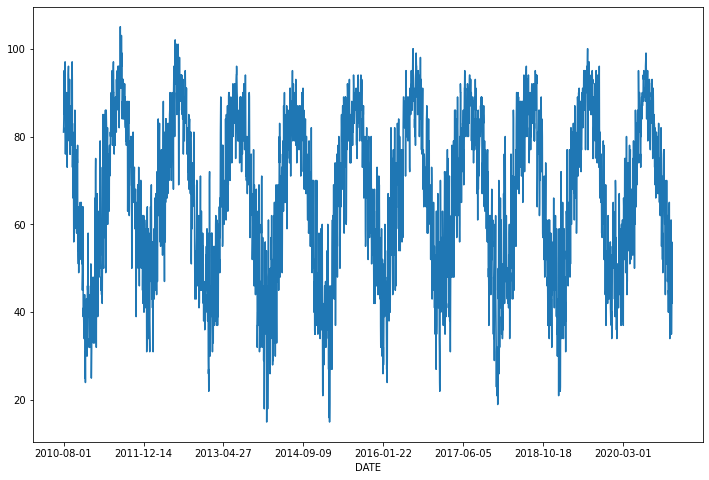

In [7]:
series_tm.plot()
plt.gcf().set_size_inches(12,8)
plt.show()

### Autocorrelation

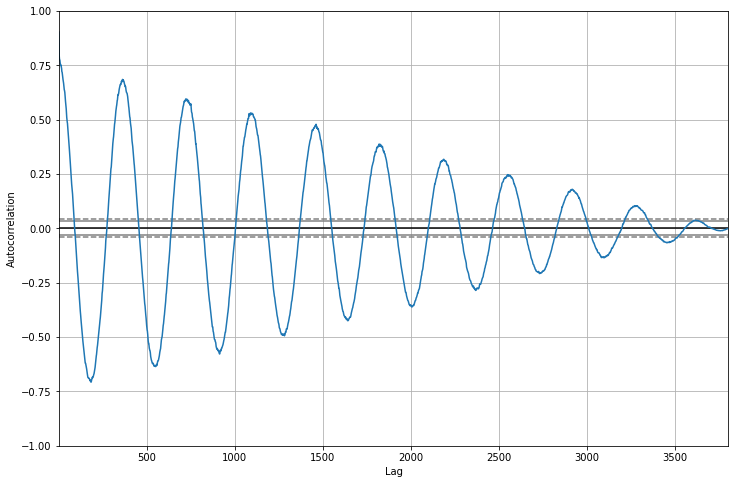

In [8]:
from pandas.plotting import autocorrelation_plot

plt.gcf().set_size_inches(12,8)
autocorrelation_plot(series_tm)

In [9]:
dfr = df[['DATE','TMAX']].copy()

In [10]:
dfr.set_index('DATE', inplace=True)

In [11]:
dfr_sample =  dfr.head(365)

### Rolling Statistics

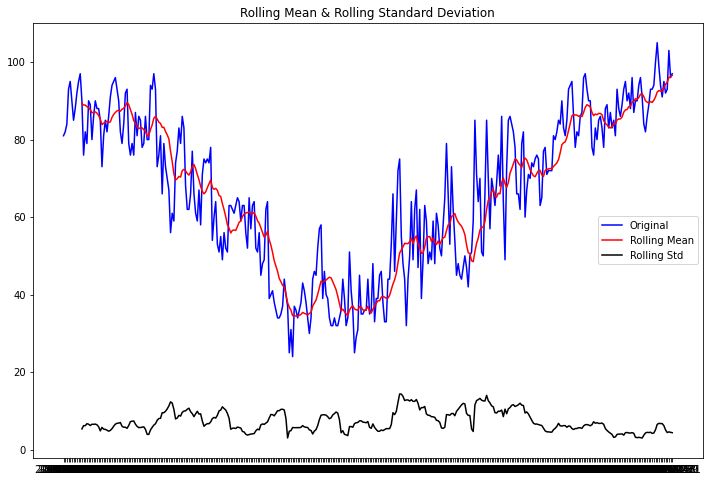

In [12]:
rolling_mean = dfr_sample.rolling(window = 12).mean()
rolling_std = dfr_sample.rolling(window = 12).std()

plt.plot(dfr_sample, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.gcf().set_size_inches(12,8)
plt.show()

### Model Summary

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3805
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13058.692
Method:                       css-mle   S.D. of innovations              7.486
Date:                Thu, 12 Aug 2021   AIC                          26131.384
Time:                        19:07:11   BIC                          26175.093
Sample:                    08-02-2010   HQIC                         26146.917
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0097      0.058     -0.168      0.867      -0.123       0.103
ar.L1.D.y     -0.2316      0.016    -14.449      0.000      -0.263      -0.200
ar.L2.D.y     -0.3187      0.016    -19.605      0.0

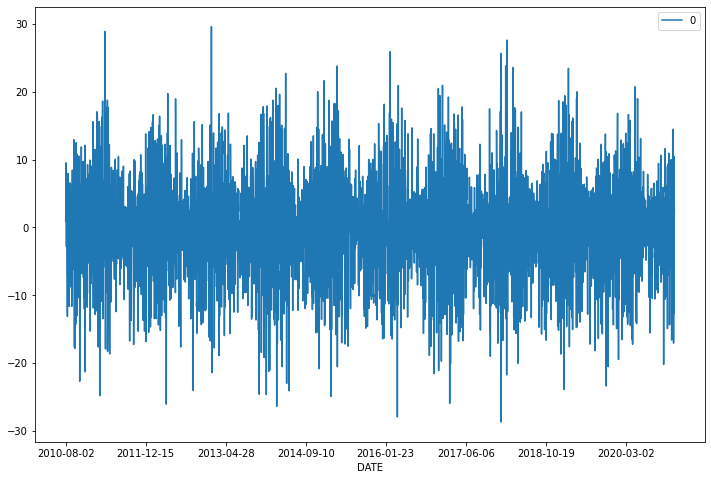

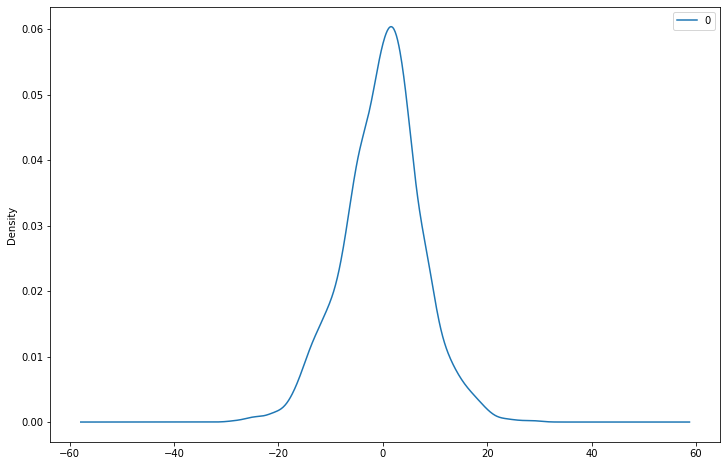

                 0
count  3805.000000
mean      0.001678
std       7.486794
min     -28.696187
25%      -4.630727
50%       0.416036
75%       4.569905
max      29.615018


In [13]:
model = ARIMA(series_tm, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.gcf().set_size_inches(12,8)
plt.show()

residuals.plot(kind='kde')
plt.gcf().set_size_inches(12,8)
plt.show()

print(residuals.describe())

predicted=86.044810, expected=80.000000
predicted=83.319626, expected=86.000000
predicted=87.629776, expected=91.000000
predicted=90.885565, expected=87.000000
predicted=86.453517, expected=86.000000
predicted=86.024487, expected=88.000000
predicted=87.093460, expected=86.000000
predicted=85.942369, expected=87.000000
predicted=87.692086, expected=86.000000
predicted=86.262309, expected=85.000000
predicted=85.292509, expected=81.000000
predicted=82.639488, expected=80.000000
predicted=81.729531, expected=80.000000
predicted=81.650672, expected=89.000000
predicted=88.007445, expected=92.000000
predicted=89.319759, expected=91.000000
predicted=88.165658, expected=90.000000
predicted=88.308346, expected=90.000000
predicted=88.633919, expected=90.000000
predicted=89.940766, expected=84.000000
predicted=85.698996, expected=80.000000
predicted=82.941037, expected=88.000000
predicted=88.944558, expected=87.000000
predicted=86.737752, expected=83.000000
predicted=83.807319, expected=89.000000


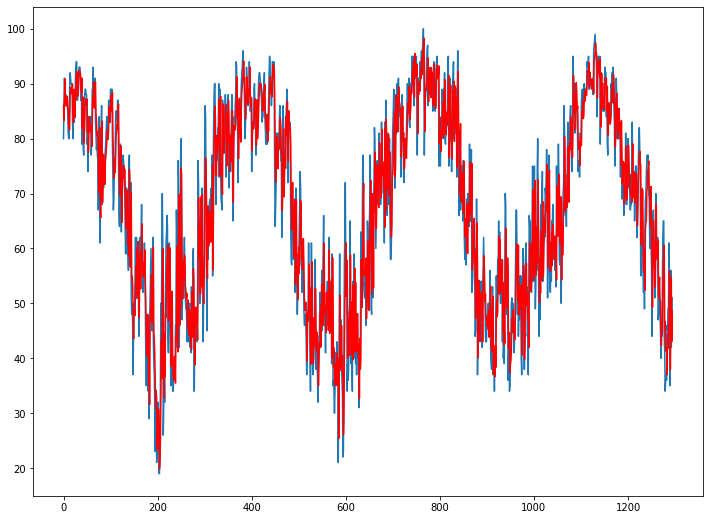

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = series_tm.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.gcf().set_size_inches(12,9)
plt.show()

In [27]:
#Error metric
from sklearn.metrics import r2_score

r2 = r2_score(test, predictions)

print('r2 score for ARIMA is:',r2)

r2 score for ARIMA is: 0.8370647483319289


## SARIMAX

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        #try: 
        model = SARIMAX(exog, order=order).fit(disp=-1)
    #except:
    #        continue
            
        aic = model.aic
        results.append([order, model.aic])
    #print(results)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [16]:
import itertools
from tqdm import tqdm_notebook

ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = itertools.product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series_tm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [17]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(4, 0, 8)",25990.146712
1,"(5, 0, 8)",25990.768736
2,"(6, 0, 3)",25997.564213
3,"(5, 0, 4)",25998.233295
4,"(4, 0, 5)",25999.173587


In [18]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = itertools.product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = series_tm)

result_d_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

,"(p, d, q)",AIC
0,"(1, 1, 6)",25950.915507
1,"(6, 1, 8)",25954.014212
2,"(5, 1, 7)",25955.683753
3,"(3, 1, 8)",25959.936208
4,"(3, 1, 7)",25961.725349
...,...,...
95,"(3, 1, 0)",26275.253326
96,"(2, 1, 0)",26397.075033
97,"(0, 1, 1)",26540.466352
98,"(1, 1, 0)",26599.678842


In [19]:
result_d_1.head()

,"(p, d, q)",AIC
0,"(1, 1, 6)",25950.915507
1,"(6, 1, 8)",25954.014212
2,"(5, 1, 7)",25955.683753
3,"(3, 1, 8)",25959.936208
4,"(3, 1, 7)",25961.725349


In [20]:
final_result = result_d_0.append(result_d_1)
best_models = final_result.sort_values(by='AIC' , ascending=True).reset_index(drop=True).head()

In [21]:
best_models.head()

,"(p, d, q)",AIC
0,"(1, 1, 6)",25950.915507
1,"(6, 1, 8)",25954.014212
2,"(5, 1, 7)",25955.683753
3,"(3, 1, 8)",25959.936208
4,"(3, 1, 7)",25961.725349


In [22]:
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_params_1 = best_models[best_models.columns[0]][1]

In [23]:
best_model_0 = SARIMAX(series_tm, order=best_model_params_0).fit()
print(best_model_0.summary())
best_model_1 = SARIMAX(series_tm, order=best_model_params_1).fit()
print(best_model_1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3806
Model:               SARIMAX(1, 1, 6)   Log Likelihood              -12967.458
Date:                Thu, 12 Aug 2021   AIC                          25950.916
Time:                        19:33:05   BIC                          26000.868
Sample:                    08-01-2010   HQIC                         25968.667
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9826      0.006    151.199      0.000       0.970       0.995
ma.L1         -1.2725      0.016    -81.618      0.000      -1.303      -1.242
ma.L2         -0.0277      0.023     -1.182      0.2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3806
Model:               SARIMAX(6, 1, 8)   Log Likelihood              -12962.007
Date:                Thu, 12 Aug 2021   AIC                          25954.014
Time:                        19:33:18   BIC                          26047.675
Sample:                    08-01-2010   HQIC                         25987.299
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6459      0.104     -6.181      0.000      -0.851      -0.441
ar.L2         -0.4032      0.105     -3.851      0.000      -0.608      -0.198
ar.L3          1.1546      0.064     17.992      0.0

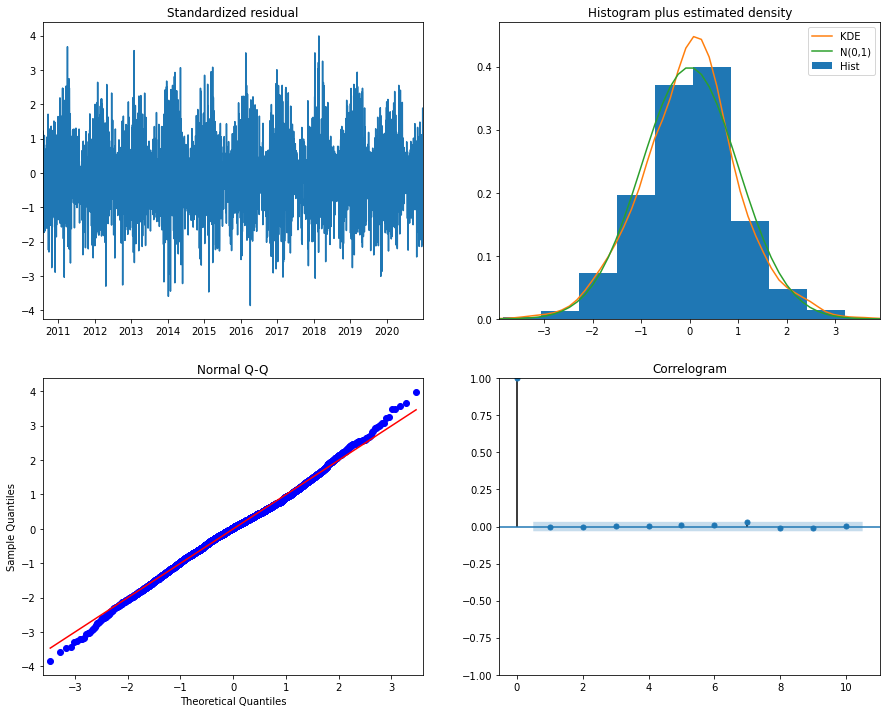

In [24]:
best_model_0.plot_diagnostics(figsize=(15,12))
plt.show()